# Modeling
## Initial modelling - building a classification model for isFraud

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)


Loading dataset

In [2]:
filepath = "D:\Fredrik\ML Engineer capstone\data\PS_20174392719_1491204439457_log.csv"
dat = pd.read_csv(filepath)

Dropping columns deemed unuseful in the preliminary exploratory analysis. I am unsure if 'step' is a useful variable in real world application as it is a syntethic time measurement which probably will be hard to replicate in a production environment. However, the variabel 'step' was deemed to probably have some predictive power over isFraud and is included.

In [3]:
dat = dat.drop(columns = ['nameOrig','nameDest','isFlaggedFraud'])

One-hot-encoding the categorical variable 'type', concatenating to dataset and dropping type variable. 

In [4]:
type_one_hot = pd.get_dummies(dat['type'])
dat_onehot = pd.concat([dat.reset_index(drop=True), type_one_hot], axis=1)
dat_onehot = dat_onehot.drop(columns = ['type'])
dat_onehot.head(20)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.640,170136.000,160296.360,0.000,0.000,0,0,0,0,1,0
1,1,1864.280,21249.000,19384.720,0.000,0.000,0,0,0,0,1,0
2,1,181.000,181.000,0.000,0.000,0.000,1,0,0,0,0,1
3,1,181.000,181.000,0.000,21182.000,0.000,1,0,1,0,0,0
4,1,11668.140,41554.000,29885.860,0.000,0.000,0,0,0,0,1,0
5,1,7817.710,53860.000,46042.290,0.000,0.000,0,0,0,0,1,0
6,1,7107.770,183195.000,176087.230,0.000,0.000,0,0,0,0,1,0
7,1,7861.640,176087.230,168225.590,0.000,0.000,0,0,0,0,1,0
8,1,4024.360,2671.000,0.000,0.000,0.000,0,0,0,0,1,0
9,1,5337.770,41720.000,36382.230,41898.000,40348.790,0,0,0,1,0,0


## Splitting the data
The data is split into training, testing and validation sets. All models are trained and tested on the same train and testset. The final model performance is tested on the validation set. The validation set will contain 20 percent of the data. From the remaining 80 percent, 70 percent will be used for training and 30 percent for testing. The final split is then
* Validation: 20%
* Training: 56%
* Testing: 24%

In [5]:
y = dat_onehot['isFraud']
X = dat_onehot.drop(columns = ['isFraud'])
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
print(y.shape[0] / 6362620 )
print(X.shape[0]  / 6362620 )
print(X_train_test.shape[0] / 6362620 ) 
print(X_validation.shape[0] / 6362620 )
print(y_train_test.shape[0] / 6362620 )
print(y_validation.shape[0] / 6362620 )

print(y.value_counts(normalize=True)    )
print(y_train_test.value_counts(normalize=True))
print(y_validation.value_counts(normalize=True))


1.0
1.0
0.8
0.2
0.8
0.2
0   0.999
1   0.001
Name: isFraud, dtype: float64
0   0.999
1   0.001
Name: isFraud, dtype: float64
0   0.999
1   0.001
Name: isFraud, dtype: float64


Splits correctly with the same class distribution of the target variable. Splitting X_train_test and y_train_test into train and test sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.30, random_state=42)
print(X_train.shape[0] / 6362620 )
print(X_test.shape[0] / 6362620 )
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0.5599999685664082
0.24000003143359183
0   0.999
1   0.001
Name: isFraud, dtype: float64
0   0.999
1   0.001
Name: isFraud, dtype: float64


In [8]:
display(X_train.head())
display(X_test.head())
display(X_validation.head())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
3248568,251,350032.210,0.000,0.000,8003782.700,8353814.900,0,0,0,0,1
3601945,263,50206.160,0.000,0.000,53269.530,103475.690,0,1,0,0,0
5198005,369,21193.430,0.000,21193.430,140592.680,119399.250,1,0,0,0,0
3267301,251,188488.600,20129.000,208617.600,0.000,0.000,1,0,0,0,0
5565997,393,39520.740,39998.000,477.260,0.000,0.000,0,0,0,1,0


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4560852,327,314442.100,9968.000,324410.100,4729972.460,4415530.370,1,0,0,0,0
2717123,211,72928.280,0.000,0.000,5962624.040,6035552.320,0,1,0,0,0
4536167,326,207906.480,0.000,0.000,941808.610,1149715.090,0,1,0,0,0
388578,17,31817.410,15199.000,0.000,0.000,0.000,0,0,0,1,0
6048514,492,58029.840,227361.000,169331.160,269969.060,327998.900,0,1,0,0,0


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
3737323,278,330218.420,20866.000,351084.420,452419.570,122201.150,1,0,0,0,0
264914,15,11647.080,30370.000,18722.920,0.000,0.000,0,0,0,1,0
85647,10,152264.210,106589.000,258853.210,201303.010,49038.800,1,0,0,0,0
5899326,403,1551760.630,0.000,0.000,3198359.450,4750120.080,0,0,0,0,1
2544263,206,78172.300,2921331.580,2999503.880,415821.900,337649.600,1,0,0,0,0


# Model fitting

* Logistic regression (benchmark model)
* Decision Tree Classifier (C4.5)
* Random Forest
* Gradient booting (xgboost or lightGBM)
* Neural network (keras)

I am making a quick version of each algorithm and check initial performance with minimal tuning before deciding which algorithm to concentrate on and to tune to the final model.

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model_logistic = LogisticRegression(random_state = 42, solver = 'lbfgs')
model_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
pred_logistic = model_logistic.predict_proba(X_test)
pred_logistic_class = model_logistic.predict(X_test)

Plotting model predictions

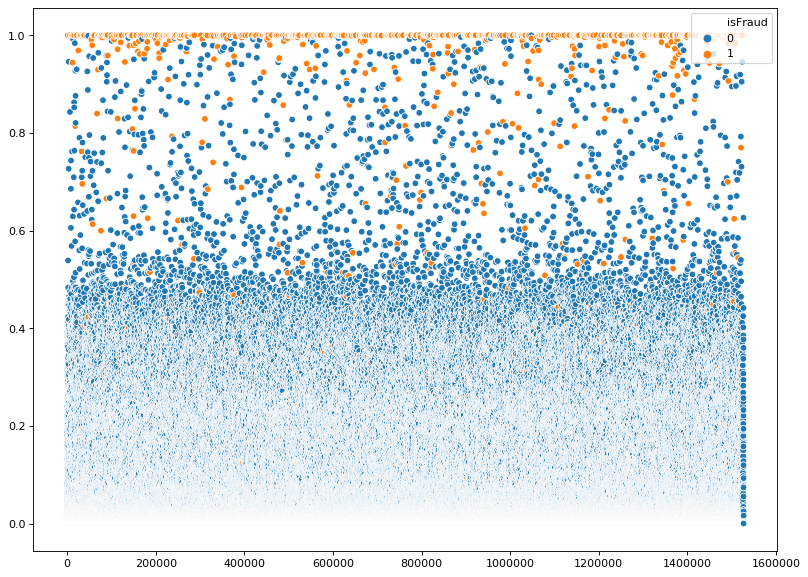

In [12]:
fig=plt.figure(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = range(pred_logistic.shape[0]), y = pred_logistic[:,1], hue = y_test)

## Model metrics

### Primary model

In [13]:
print(m.accuracy_score(y_test, pred_logistic_class))
print(m.f1_score(y_test, pred_logistic_class))
print(m.fbeta_score(y_test, pred_logistic_class, beta=0.5))
print(m.fbeta_score(y_test, pred_logistic_class, beta = 1.5))

0.9982351350236308
0.3868031854379977
0.36446273904467885
0.4026234286755329


### Secondary high precision and high recall models

In [14]:
def threshold_optimizer(y_true, y_pred, beta_low, beta_high, steps):
    increments = 100 / steps / 100
    steps = np.arange(0.01,1,increments)
    score_beta_low = []
    score_beta_high = []
    score_kappa = []
    for i in steps:
        pred_class = np.where(y_pred >= i, 1, 0  )[:,1]
        score_beta_low.append(m.fbeta_score(y_true, pred_class, beta_low))
        score_beta_high.append(m.fbeta_score(y_true, pred_class, beta_high))
        score_kappa.append(m.cohen_kappa_score(y_true, pred_class))
        #print(i)
    
    score = pd.DataFrame({'step': steps,
                         'score_beta_low': score_beta_low,
                         'score_beta_high': score_beta_high,
                         'score_kappa': score_kappa})
    return score

In [15]:
def plot_performance(scores):
    kappa_horiz = float(scores.score_kappa.loc[scores.score_kappa == max(scores.score_kappa)].head(1))
    kappa_vertical = float(scores.step.loc[scores.score_kappa == max(scores.score_kappa)].head(1))

    beta_low_horiz = float(scores.score_beta_low.loc[scores.score_beta_low == max(scores.score_beta_low)].head(1))
    beta_low_vertical = float(scores.step.loc[scores.score_beta_low == max(scores.score_beta_low)].head(1))

    beta_high_horiz = float(scores.score_beta_high.loc[scores.score_beta_high == max(scores.score_beta_high)].head(1))
    beta_high_vertical = float(scores.step.loc[scores.score_beta_high == max(scores.score_beta_high)].head(1))
    
    # Kappa
    fig=plt.figure(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(scores.step, scores.score_kappa)
    plt.axhline(y = kappa_horiz, color='r', linestyle='-')
    plt.axvline(x = kappa_vertical, color='r', linestyle='-')
    plt.text(0.1,0.4, 'Optimal cuttoff: {}, gives kappa: {}'.format(round(kappa_vertical,3), round(kappa_horiz,3)))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
    
    # Beta low
    fig=plt.figure(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(scores.step, scores.score_beta_low)
    plt.axhline(y = beta_low_horiz, color='r', linestyle='-')
    plt.axvline(x = beta_low_vertical, color='r', linestyle='-')
    plt.text(0.1,0.4, 'Optimal cuttoff: {}, gives beta_low: {}'.format(round(beta_low_vertical,3), round(beta_low_horiz,3)))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
    
    # Beta High
    fig=plt.figure(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(scores.step, scores.score_beta_high)
    plt.axhline(y = beta_high_horiz, color='r', linestyle='-')
    plt.axvline(x = beta_high_vertical, color='r', linestyle='-')
    plt.text(0.1,0.4, 'Optimal cuttoff: {}, gives beta_high: {}'.format(round(beta_high_vertical,3), round(beta_high_horiz,3)))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
    

In [16]:
scores = threshold_optimizer(y_test, pred_logistic, beta_low = 0.5, beta_high = 1.5, steps = 100)
display(scores.head(20))

,step,score_beta_low,score_beta_high,score_kappa
0,0.010,0.015,0.036,0.020
1,0.020,0.018,0.044,0.026
2,0.030,0.020,0.049,0.029
3,0.040,0.021,0.052,0.031
4,0.050,0.023,0.055,0.033
5,0.060,0.024,0.057,0.034
6,0.070,0.024,0.059,0.036
7,0.080,0.025,0.061,0.037
8,0.090,0.026,0.063,0.039
9,0.100,0.027,0.066,0.040


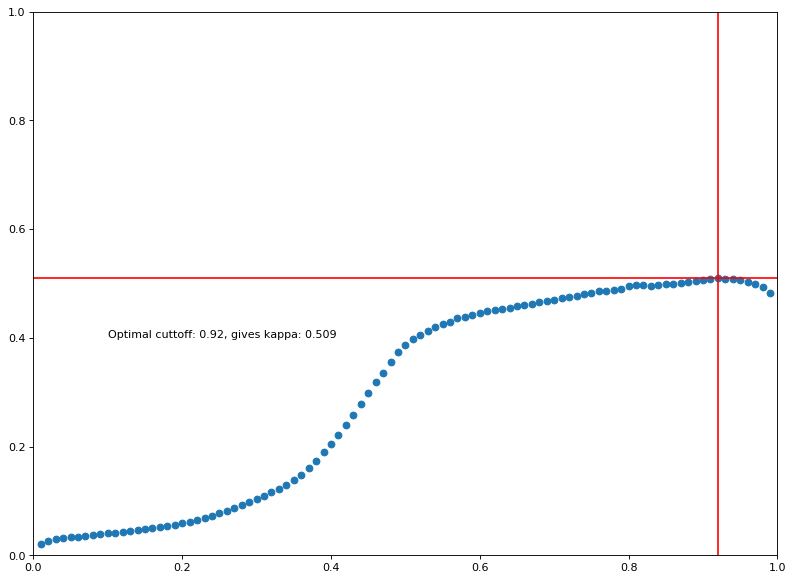

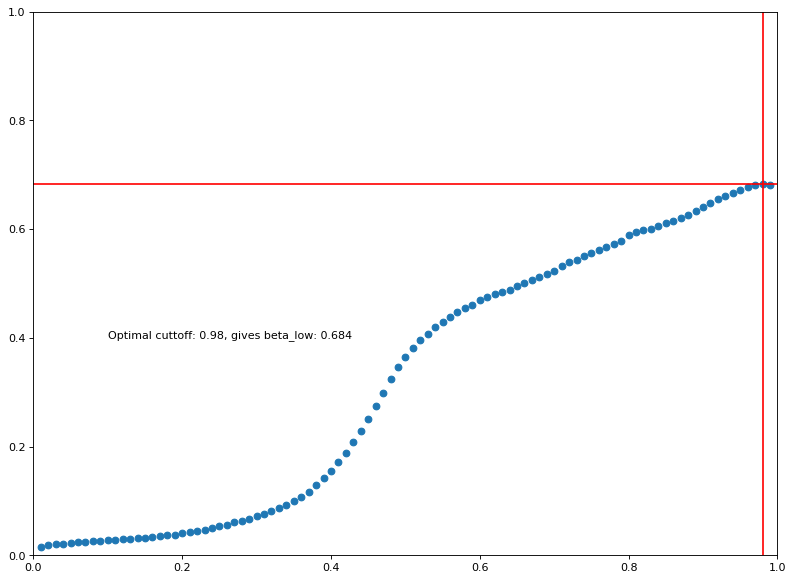

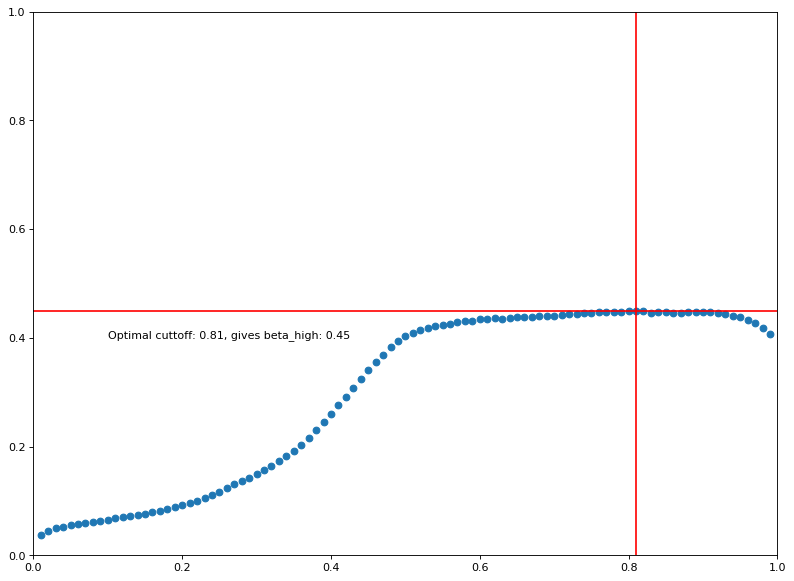

In [17]:
plot_performance(scores)

In [18]:
# Modal class

modal_class = np.where(pred_logistic >= 0,0,0  )[:,1]
print(m.fbeta_score(y_test, modal_class, 0.5))
print(m.fbeta_score(y_test, modal_class, 1.5))
print(m.cohen_kappa_score(y_test, modal_class))
print(m.accuracy_score(y_test, modal_class))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0
0.0
0.0
0.998707948572031


## Benchmark modell
### Logistic regression 
The vanilla logistic regression model serves as a benchmark through out the modeling building project. With out three models we register the following metrics:

* Cohen's Kappa (Primary model): 0.509
* F_beta_0.5 (High precision model): 0.684
* F_beta_1.5 (High recall model): 0.450


## Decision Tree Classifier (C4.5)

In [19]:
from sklearn import tree
import graphviz 
model_decision_tree = tree.DecisionTreeClassifier(random_state=42, max_depth=6)
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

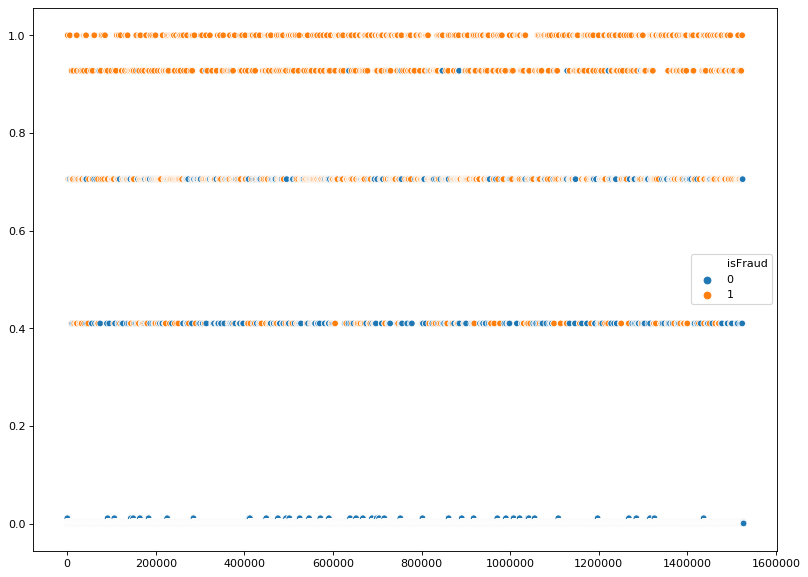

In [20]:
pred_decision_tree = model_decision_tree.predict_proba(X_test)
fig=plt.figure(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = range(pred_decision_tree.shape[0]), y = pred_decision_tree[:,1], hue = y_test)

In [21]:
pd.Series(pred_decision_tree[:,1]).value_counts()

0.000    1312426
0.003      81640
0.000      73990
0.000      48384
0.000       7686
0.001        966
0.705        736
0.410        411
1.000        385
0.927        360
0.011         45
dtype: int64

In [22]:
scores_decision_tree = threshold_optimizer(y_test, pred_decision_tree, beta_low = 0.5, beta_high = 1.5, steps = 100)
display(scores.head(20))

,step,score_beta_low,score_beta_high,score_kappa
0,0.010,0.015,0.036,0.020
1,0.020,0.018,0.044,0.026
2,0.030,0.020,0.049,0.029
3,0.040,0.021,0.052,0.031
4,0.050,0.023,0.055,0.033
5,0.060,0.024,0.057,0.034
6,0.070,0.024,0.059,0.036
7,0.080,0.025,0.061,0.037
8,0.090,0.026,0.063,0.039
9,0.100,0.027,0.066,0.040


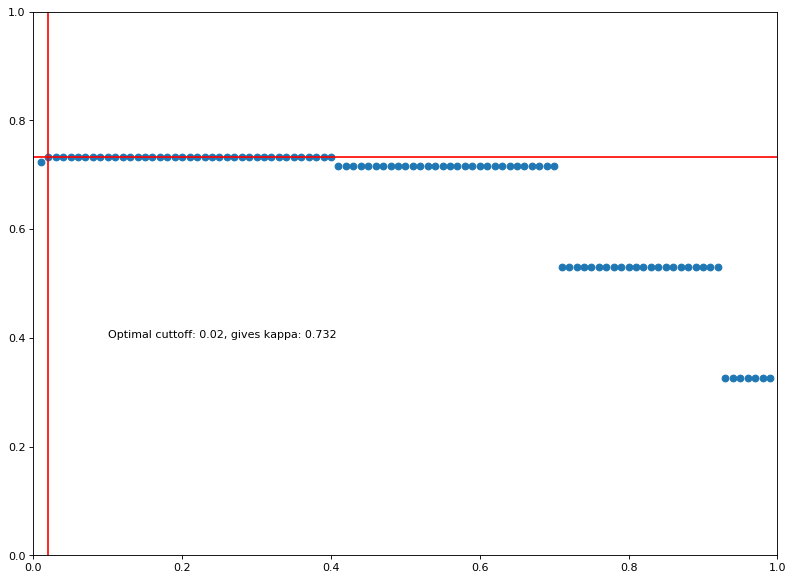

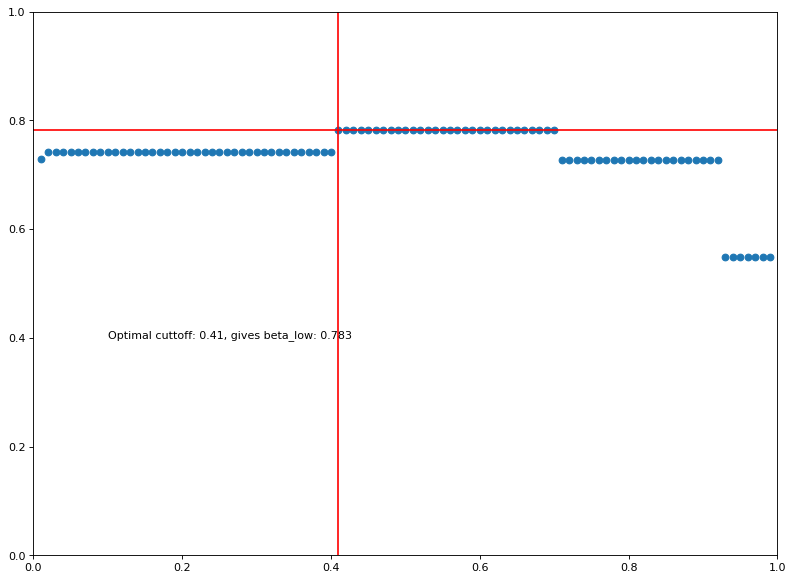

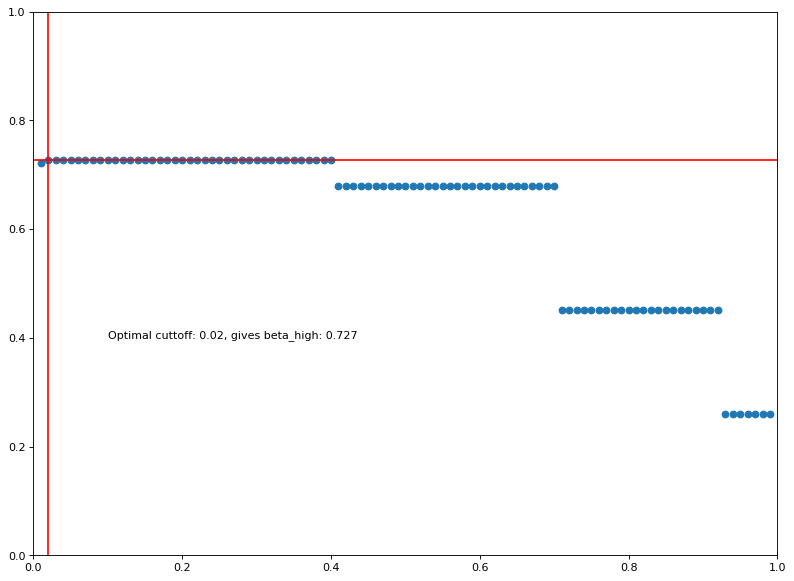

In [23]:
plot_performance(scores_decision_tree)

### Evaluation
The simple decision tree model outperformes the logistic regression model with the following metrics:
* The primary model achieves a Cohen's Kappa of 0.732 (vs. 0.509 in the baseline (logistic regression) model
* The high precision model acheives a F_beta_0.5 of 0.783 (vs. 0.684 in the baseline model)
* The high recall model achieves a F_beta_1.5 of 0.727 (vs. 0.450 in the baseline model)


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(random_state=42, n_estimators = 100, max_depth=6)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

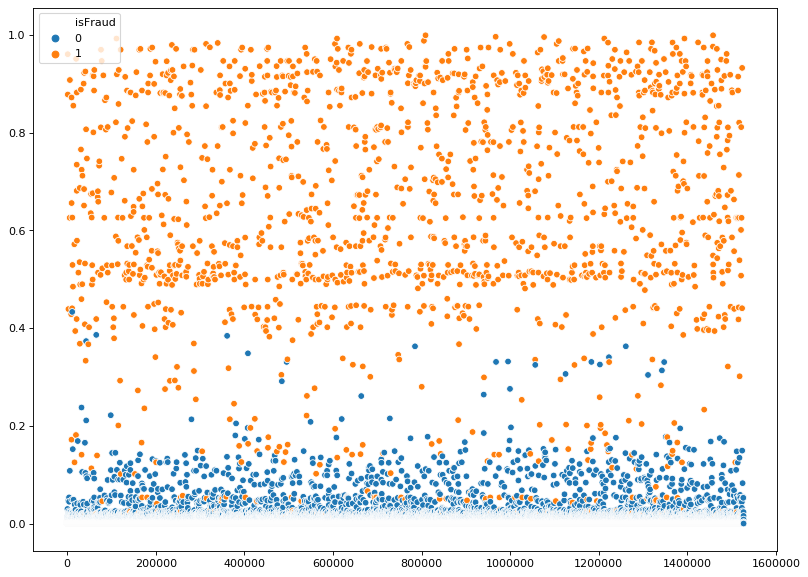

In [25]:
pred_random_forest = model_random_forest.predict_proba(X_test)
fig=plt.figure(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = range(pred_random_forest.shape[0]), y = pred_random_forest[:,1], hue = y_test)

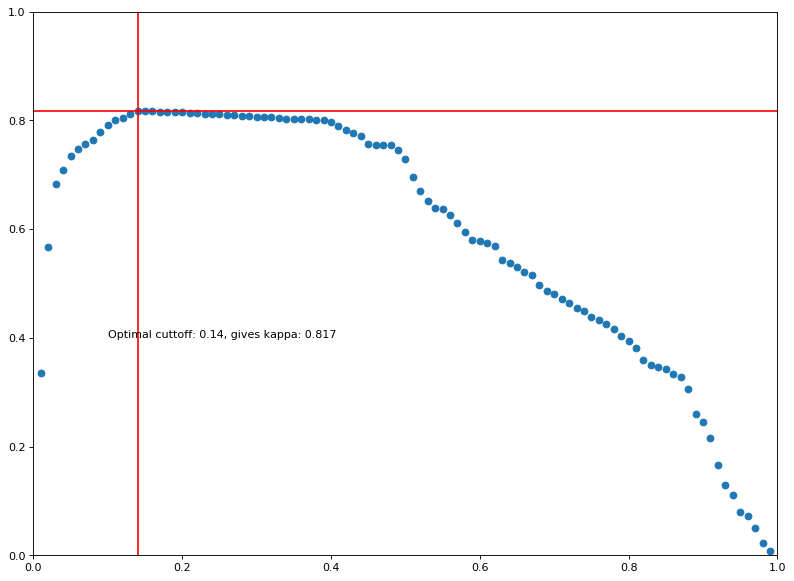

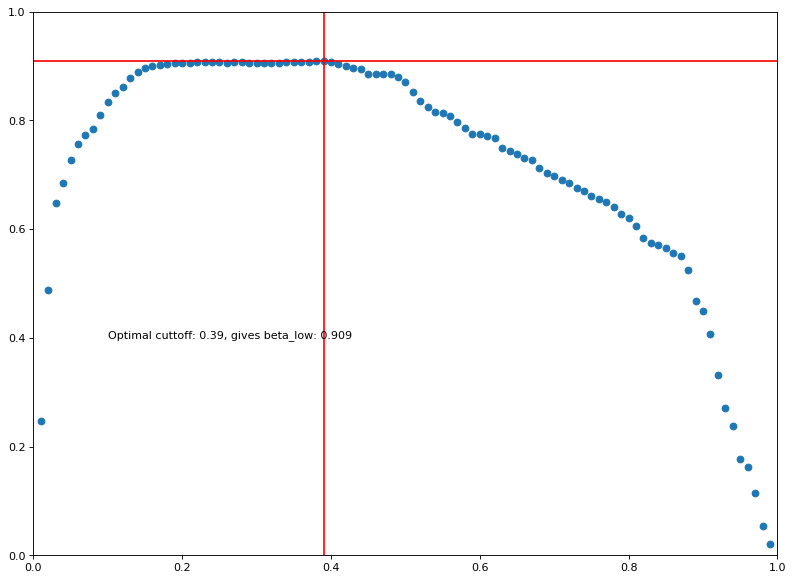

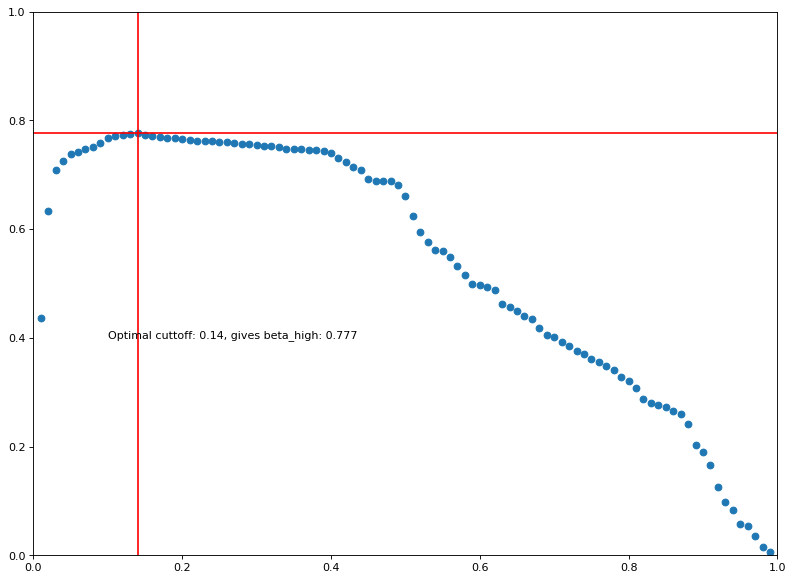

In [26]:
scores_random_forest = threshold_optimizer(y_test, pred_random_forest, beta_low = 0.5, beta_high = 1.5, steps = 100)
plot_performance(scores_random_forest)

### Evaluation
The random forest model performs well compared to the decision tree and logistic regression models. It achieves higher Cohen's Kappa, F_beta_0.5 and F_beta_1.5.

* Cohen's Kappa: 0.817
* High precision (F_beta_0.5): 0.909
* High recall (F_beta_1.5): 0.777


## Gradient booting (xgboost or lightGBM)

In [27]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

# Create parameters to search
gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42],
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

In [28]:
import lightgbm as lgb
train_lgb = lgb.Dataset(data = X_train, label = y_train)
test_lgb = lgb.Dataset(data = X_test, label = y_test)

#param = {'num_leaves': 2
#         , 'max_depth': 6
#         , 'objective':'binary'
#         , 'metric': 'binary_logloss'}

model_lgb = lgb.train(params, train_lgb, num_boost_round=500)

In [29]:
pred_lgb = model_lgb.predict(X_test)

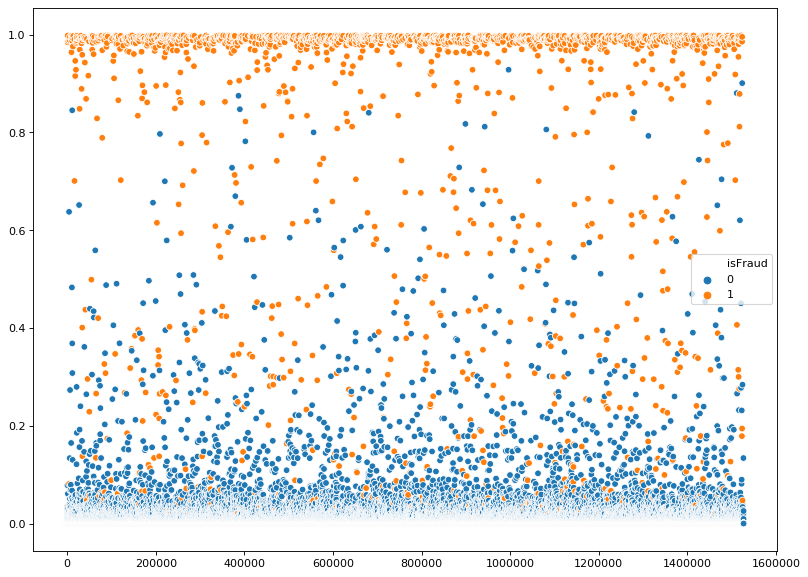

In [30]:
fig=plt.figure(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = range(pred_lgb.shape[0]), y = pred_lgb, hue = y_test)

In [31]:
zero_array = np.zeros(len(pred_lgb))
pred_lgb_array = np.array(pred_lgb)
pred_lgb_np= []
for i in range(0, len(zero_array)):
    pred_lgb_np.append( [ zero_array[i], pred_lgb[i] ])
    
pred_lgb_np = np.array(pred_lgb_np)

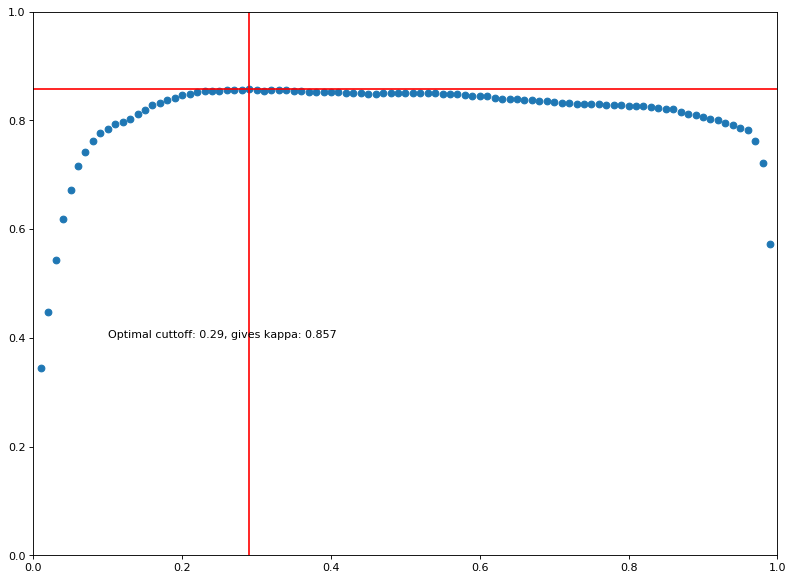

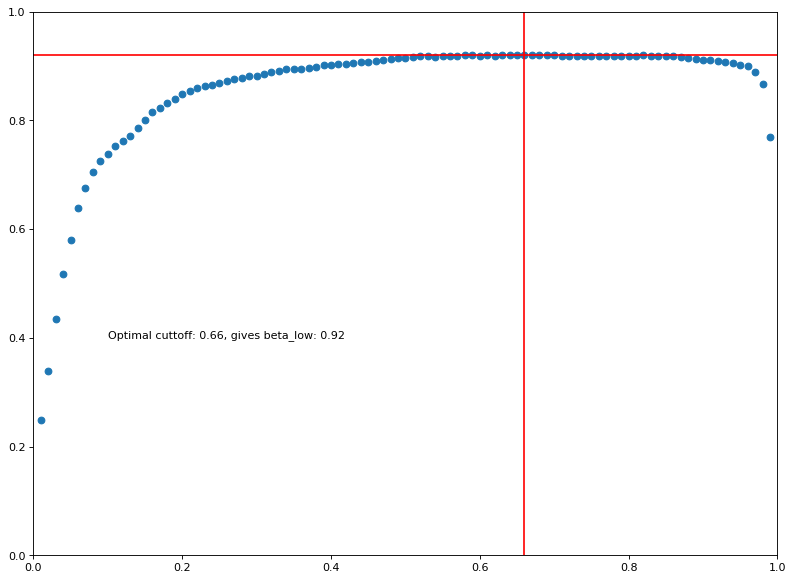

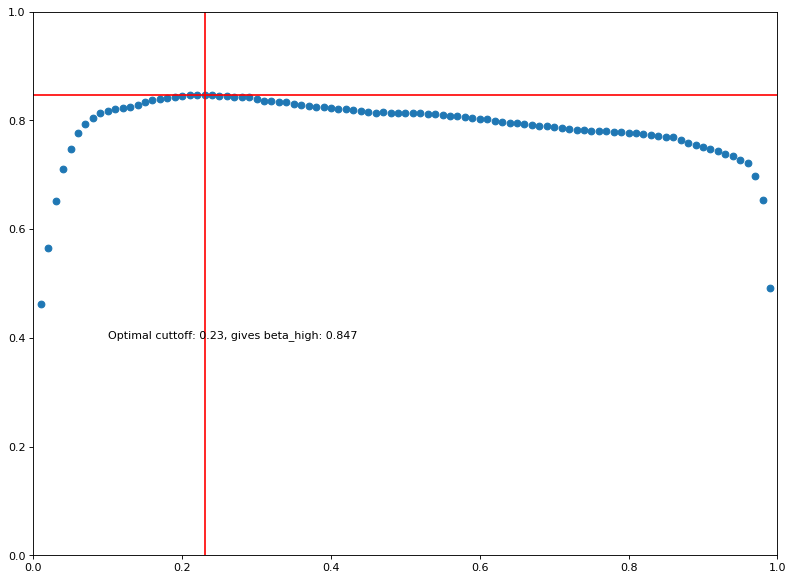

In [32]:
scores_lgb = threshold_optimizer(y_test, pred_lgb_np, beta_low = 0.5, beta_high = 1.5, steps = 100)
plot_performance(scores_lgb)

## Neural network (keras)


In [2]:
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.models import load_model
from keras.layers import Lambda
import tensorflow as tf

#model = keras.models.load_model('my_model.h5', custom_objects={'tf': tf})


Using TensorFlow backend.


AttributeError: module '_pywrap_tensorflow_internal' has no attribute 'TF_ListPhysicalDevices'

In [10]:
X_train.shape
# https://www.kaggle.com/dakshmiglani/credit-card-fraudulent-detection-with-dnn-keras

(3563067, 11)

### Preprocessing
Scaling and centering with the StandardScaler in the sklearn package

In [11]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [12]:
model_nn = Sequential([
    Dense(units=8, kernel_initializer='uniform', input_dim=11, activation='relu'),
    #Dense(units=16, kernel_initializer='uniform', activation='relu'),
    #Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    #Dropout(0.25),
    #Dense(20, kernel_initializer='uniform', activation='relu'),
    #Dense(24, kernel_initializer='uniform', activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

NameError: name 'Sequential' is not defined

In [37]:
model_nn.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [43]:
model_nn.fit(X_train_sc, y_train, batch_size = 15, epochs=2)

NameError: name 'tf' is not defined

In [42]:
import tensorflow
print(tensorflow.__version__)

1.13.1
